In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def create_mock_meg_data(num_samples=200, num_features=20):
    """
    Generates a synthetic dataset mimicking MEG wave data with a numerical target.
    :param num_samples: The number of data points.
    :param num_features: The number of MEG wave features.
    :return: A DataFrame with features and a target column.
    """
    time = np.linspace(0.001, 0.2, num_samples)
    data = {'time': time}
    feature_names = []

    # Create features with some correlation to the time and a random component
    for i in range(num_features):
        feature_name = f'MEG{i+1:04}1'
        data[feature_name] = 10 * np.sin(time * (100 + i)) + np.random.randn(num_samples) * 2
        feature_names.append(feature_name)

    df = pd.DataFrame(data)

    # Create a target variable that is a function of some of the features
    # Using the first two generated feature names
    df['target_value'] = (df[feature_names[0]] * 2 + df[feature_names[1]] * 0.5 + np.random.randn(num_samples) * 5)

    return df

# Main section
if __name__ == '__main__':
    meg_data = create_mock_meg_data()
    print("Synthetic MEG data created.")
    print("DataFrame shape:", meg_data.shape)
    print("Columns:", meg_data.columns.tolist())

    # Split data into features and target
    X = meg_data.drop('target_value', axis=1)
    y = meg_data['target_value']

    # Perform a train-test split for all subsequent regression tasks
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    print("\nData split into training and testing sets.")

Synthetic MEG data created.
DataFrame shape: (200, 22)
Columns: ['time', 'MEG00011', 'MEG00021', 'MEG00031', 'MEG00041', 'MEG00051', 'MEG00061', 'MEG00071', 'MEG00081', 'MEG00091', 'MEG00101', 'MEG00111', 'MEG00121', 'MEG00131', 'MEG00141', 'MEG00151', 'MEG00161', 'MEG00171', 'MEG00181', 'MEG00191', 'MEG00201', 'target_value']

Data split into training and testing sets.


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

def train_linear_regression(X_train_single_feature, y_train):
    """
    Trains a linear regression model with a single feature.
    :param X_train_single_feature: A DataFrame or array with one feature.
    :param y_train: The target values.
    :return: The trained LinearRegression model.
    """
    reg = LinearRegression().fit(X_train_single_feature, y_train)
    return reg

# Main section
if __name__ == '__main__':
    # Using 'MEG00011' as the single feature
    X_train_single = X_train[['MEG00011']]
    X_test_single = X_test[['MEG00011']]

    reg_model_single = train_linear_regression(X_train_single, y_train)

    print("\n--- A1. Simple Linear Regression ---")
    print("Linear regression model trained with a single feature.")
    print("Model coefficients:", reg_model_single.coef_)
    print("Model intercept:", reg_model_single.intercept_)


--- A1. Simple Linear Regression ---
Linear regression model trained with a single feature.
Model coefficients: [2.44844105]
Model intercept: -0.7440087714784791


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

def calculate_regression_metrics(y_true, y_pred):
    """
    Calculates MSE, RMSE, MAPE, and R2 scores.
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'mse': mse, 'rmse': rmse, 'mape': mape, 'r2': r2}

# Main section
if __name__ == '__main__':
    # Predictions for the single-feature model
    y_train_pred_single = reg_model_single.predict(X_train_single)
    y_test_pred_single = reg_model_single.predict(X_test_single)

    # Calculate metrics
    metrics_train = calculate_regression_metrics(y_train, y_train_pred_single)
    metrics_test = calculate_regression_metrics(y_test, y_test_pred_single)

    print("\n--- A2. Regression Metrics for Single Feature Model ---")
    print("Training Set Metrics:")
    print(f"MSE: {metrics_train['mse']:.4f}")
    print(f"RMSE: {metrics_train['rmse']:.4f}")
    print(f"MAPE: {metrics_train['mape']:.4f}")
    print(f"R2 Score: {metrics_train['r2']:.4f}")

    print("\nTest Set Metrics:")
    print(f"MSE: {metrics_test['mse']:.4f}")
    print(f"RMSE: {metrics_test['rmse']:.4f}")
    print(f"MAPE: {metrics_test['mape']:.4f}")
    print(f"R2 Score: {metrics_test['r2']:.4f}")


--- A2. Regression Metrics for Single Feature Model ---
Training Set Metrics:
MSE: 25.5430
RMSE: 5.0540
MAPE: 0.6696
R2 Score: 0.9258

Test Set Metrics:
MSE: 24.7728
RMSE: 4.9772
MAPE: 0.3436
R2 Score: 0.9248


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

def train_and_evaluate_multi_feature_model(X_train, y_train, X_test, y_test):
    """
    Trains a linear regression model with all features and evaluates its performance.
    """
    reg = LinearRegression().fit(X_train, y_train)

    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)

    metrics_train = calculate_regression_metrics(y_train, y_train_pred)
    metrics_test = calculate_regression_metrics(y_test, y_test_pred)

    return metrics_train, metrics_test

# Main section
if __name__ == '__main__':
    metrics_train_multi, metrics_test_multi = train_and_evaluate_multi_feature_model(X_train, y_train, X_test, y_test)

    print("\n--- A3. Multi-Feature Linear Regression ---")
    print("Model trained with all available features.")

    print("\nTraining Set Metrics:")
    print(f"MSE: {metrics_train_multi['mse']:.4f}")
    print(f"RMSE: {metrics_train_multi['rmse']:.4f}")
    print(f"MAPE: {metrics_train_multi['mape']:.4f}")
    print(f"R2 Score: {metrics_train_multi['r2']:.4f}")

    print("\nTest Set Metrics:")
    print(f"MSE: {metrics_test_multi['mse']:.4f}")
    print(f"RMSE: {metrics_test_multi['rmse']:.4f}")
    print(f"MAPE: {metrics_test_multi['mape']:.4f}")
    print(f"R2 Score: {metrics_test_multi['r2']:.4f}")


--- A3. Multi-Feature Linear Regression ---
Model trained with all available features.

Training Set Metrics:
MSE: 18.1477
RMSE: 4.2600
MAPE: 0.4888
R2 Score: 0.9473

Test Set Metrics:
MSE: 28.3499
RMSE: 5.3245
MAPE: 0.3743
R2 Score: 0.9140


In [ ]:
from sklearn.cluster import KMeans

def perform_kmeans_clustering(data, k=2):
    """
    Performs k-means clustering on the given data.
    :param data: The feature data to cluster.
    :param k: The number of clusters.
    :return: The trained KMeans model.
    """
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto').fit(data)
    return kmeans

# Main section
if __name__ == '__main__':
    # Use all features, excluding the target variable and 'time' for clustering
    X_clustering = meg_data.drop(['target_value', 'time'], axis=1)
    kmeans_model = perform_kmeans_clustering(X_clustering, k=2)

    print("\n--- A4. K-Means Clustering ---")
    print("K-Means clustering performed with k=2.")
    print("Cluster labels (first 10):", kmeans_model.labels_[:10])
    print("Cluster centers (first 5 features):\n", kmeans_model.cluster_centers_[:, :5])


--- A4. K-Means Clustering ---
K-Means clustering performed with k=2.
Cluster labels (first 10): [1 1 1 1 1 1 1 1 1 1]
Cluster centers (first 5 features):
 [[-4.21279931 -4.51557133 -4.42892652 -5.10551878 -5.91212489]
 [ 3.84723906  4.20944293  4.69944241  5.48056493  5.77789271]]


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def calculate_clustering_scores(data, labels):
    """
    Calculates Silhouette, CH, and DB scores for a clustering result.
    """
    silhouette = silhouette_score(data, labels)
    ch_score = calinski_harabasz_score(data, labels)
    db_index = davies_bouldin_score(data, labels)
    return {'silhouette_score': silhouette, 'ch_score': ch_score, 'db_index': db_index}

# Main section
if __name__ == '__main__':
    clustering_scores = calculate_clustering_scores(X_clustering, kmeans_model.labels_)

    print("\n--- A5. Clustering Metrics for k=2 ---")
    print(f"Silhouette Score: {clustering_scores['silhouette_score']:.4f}")
    print(f"Calinski-Harabasz Score: {clustering_scores['ch_score']:.4f}")
    print(f"Davies-Bouldin Index: {clustering_scores['db_index']:.4f}")


--- A5. Clustering Metrics for k=2 ---
Silhouette Score: 0.4321
Calinski-Harabasz Score: 204.7472
Davies-Bouldin Index: 0.9253



--- A6. Clustering Scores vs. k ---


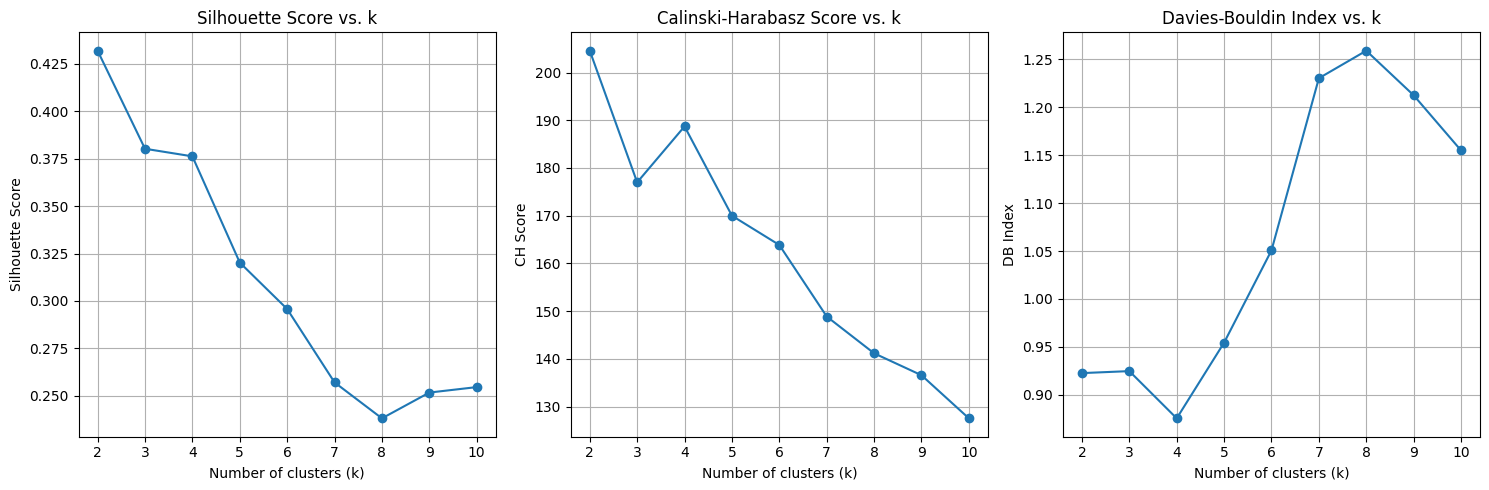

In [ ]:
import matplotlib.pyplot as plt

def plot_clustering_scores_vs_k(data, k_range):
    """
    Performs clustering for a range of k values and plots the scores.
    """
    silhouette_scores = []
    ch_scores = []
    db_indices = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(data)
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(data, labels))
        ch_scores.append(calinski_harabasz_score(data, labels))
        db_indices.append(davies_bouldin_score(data, labels))

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(k_range, silhouette_scores, marker='o')
    plt.title('Silhouette Score vs. k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.grid(True)

    plt.subplot(1, 3, 2)
    plt.plot(k_range, ch_scores, marker='o')
    plt.title('Calinski-Harabasz Score vs. k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('CH Score')
    plt.grid(True)

    plt.subplot(1, 3, 3)
    plt.plot(k_range, db_indices, marker='o')
    plt.title('Davies-Bouldin Index vs. k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('DB Index')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Main section
if __name__ == '__main__':
    k_range = range(2, 11)
    print("\n--- A6. Clustering Scores vs. k ---")
    plot_clustering_scores_vs_k(X_clustering, k_range)


--- A7. Elbow Plot for Optimal k ---


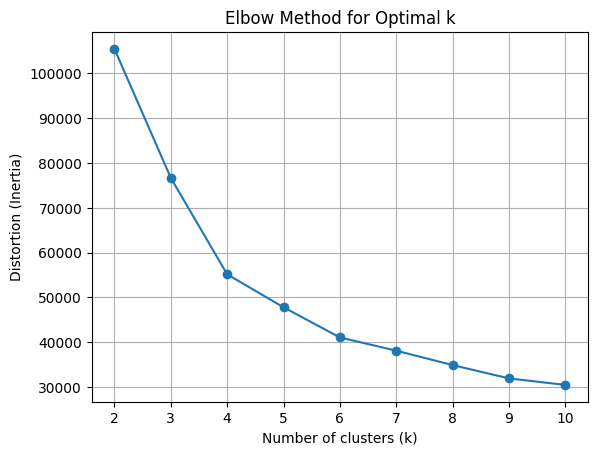

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def plot_elbow_method(data, k_range):
    """
    Generates an elbow plot to find the optimal k.
    """
    distortions = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(data)
        distortions.append(kmeans.inertia_)

    plt.plot(k_range, distortions, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion (Inertia)')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

# Main section
if __name__ == '__main__':
    k_range = range(2, 11)
    print("\n--- A7. Elbow Plot for Optimal k ---")
    plot_elbow_method(X_clustering, k_range)